In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\ARUNRAJ\Desktop\CA\Bike Sharing project\Data & Code\last_week.csv")
df1 = pd.read_csv('last_week1.csv')

In [3]:
df

,day,hour,casual,member
0,25-01-2021,0,4,4.0
1,25-01-2021,1,2,4.0
2,25-01-2021,2,3,2.0
3,25-01-2021,3,1,3.0
4,25-01-2021,4,3,2.0
...,...,...,...,...
163,31-01-2021,19,9,17.0
164,31-01-2021,20,11,16.0
165,31-01-2021,21,9,15.0
166,31-01-2021,22,9,12.0


In [4]:
df.describe()

,hour,casual,member
count,168.000000,168.000000,166.000000
mean,11.500000,31.559524,79.415663
std,6.942881,35.000890,69.720147
min,0.000000,1.000000,1.000000
25%,5.750000,7.750000,16.000000
50%,11.500000,22.000000,62.000000
75%,17.250000,45.000000,130.000000
max,23.000000,206.000000,265.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     168 non-null    object 
 1   hour    168 non-null    int64  
 2   casual  168 non-null    int64  
 3   member  166 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.4+ KB


In [6]:
df['member'] = df['member'].astype('Int64')

In [7]:
df['count'] = df['casual']* df['member']

[Text(0.5, 1.0, 'Total number of users during the week')]

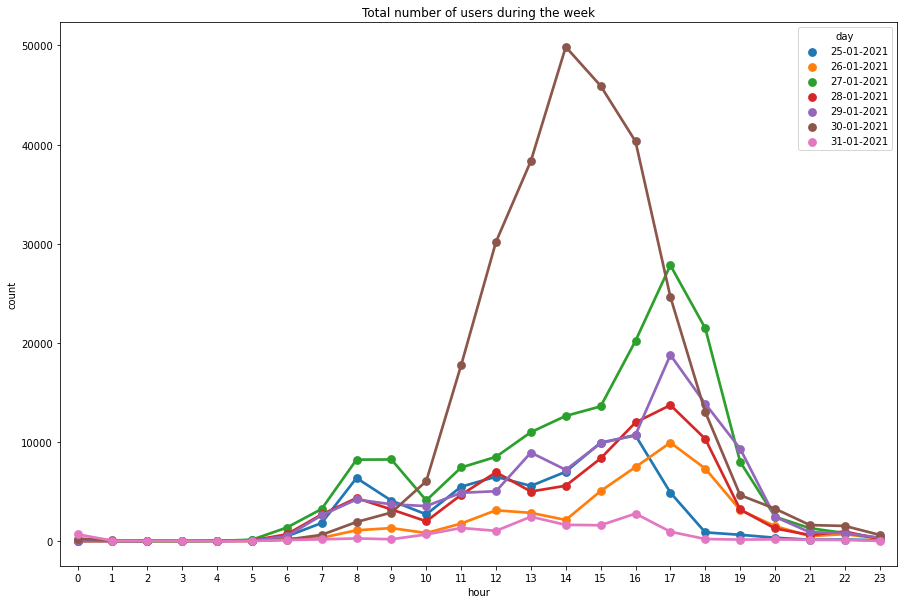

In [8]:
fig,ax = plt.subplots(figsize=(15,10))
sns.pointplot(data = df, x='hour', y='count',hue='day',ax=ax)
ax.set(title = 'Total number of users during the week')
# it seems the number of users were so high on saturday between 10-18 it might be due to the nice weather
# we can find some insights if we match this data with the weather data

[Text(0.5, 1.0, 'count of casual users during lastweek')]

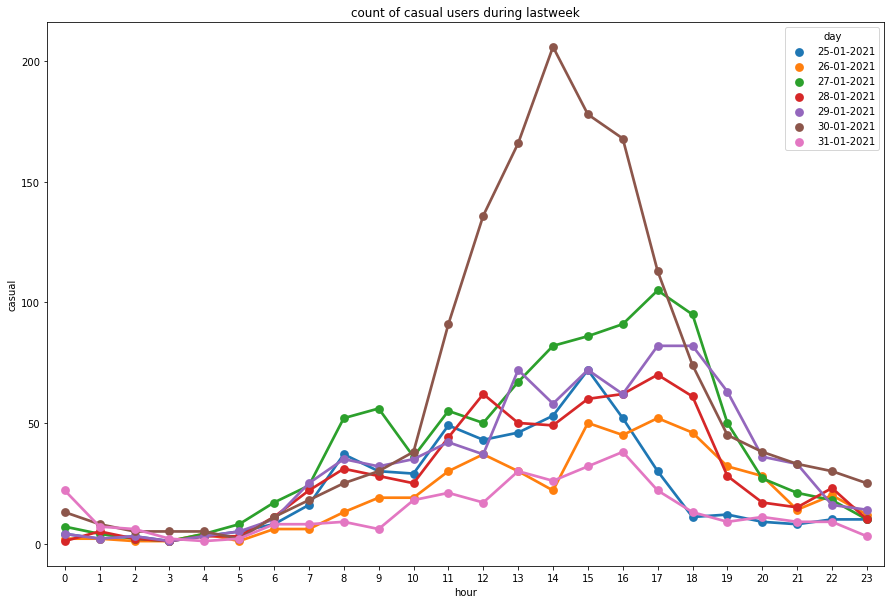

In [9]:
fig,ax = plt.subplots(figsize=(15,10))
sns.pointplot(data = df, x='hour', y='casual',hue='day',ax=ax)
ax.set(title = 'count of casual users during lastweek')
# it seems casual users were using the bike got increase on saturday(weekend) and moderate on the week days between 10-17 hours

[Text(0.5, 1.0, 'Registered users during lastweek')]

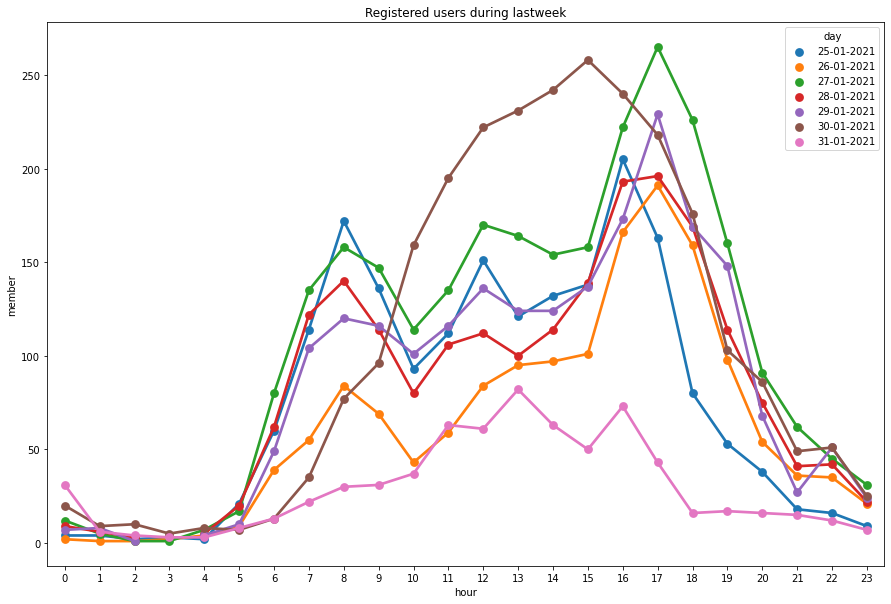

In [10]:
fig,ax = plt.subplots(figsize=(15,10))
sns.pointplot(data = df, x='hour', y='member',hue='day',ax=ax)
ax.set(title = 'Registered users during lastweek')
# it seems the bike usage got increased between 6-19 hours it may be due to good weather condition between wednesday to saturday
# the registered users also used the bike much on saturday and the sudden spike usage of casual users on saturday may caused the unavailability of bikes

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   334 non-null    int64 
 1   day          334 non-null    object
 2   hour         334 non-null    int64 
 3   member_type  334 non-null    object
 4   count        334 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 13.2+ KB


[Text(0.5, 1.0, 'Total number of users during the week')]

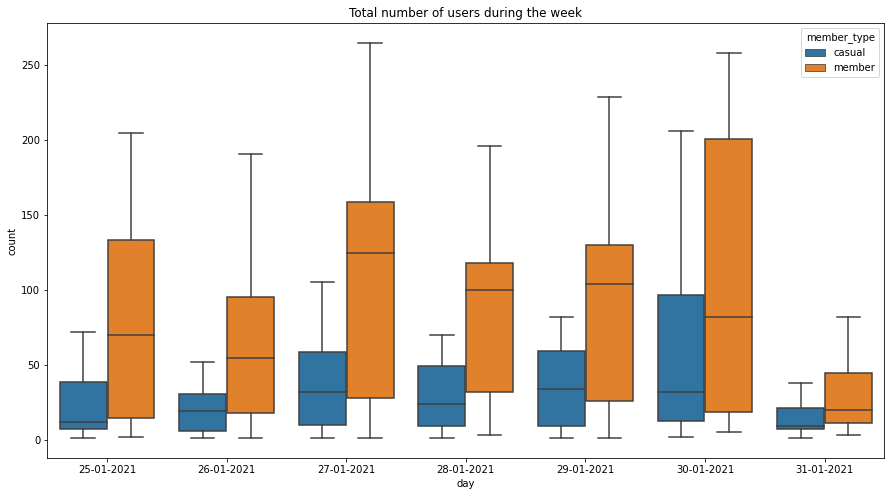

In [12]:
fig,ax = plt.subplots(figsize=(15,8))
sns.boxplot(data = df1, x ='day', y ='count', hue='member_type', ax=ax)
ax.set(title = 'Total number of users during the week')

C:\Users\ARUNRAJ\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


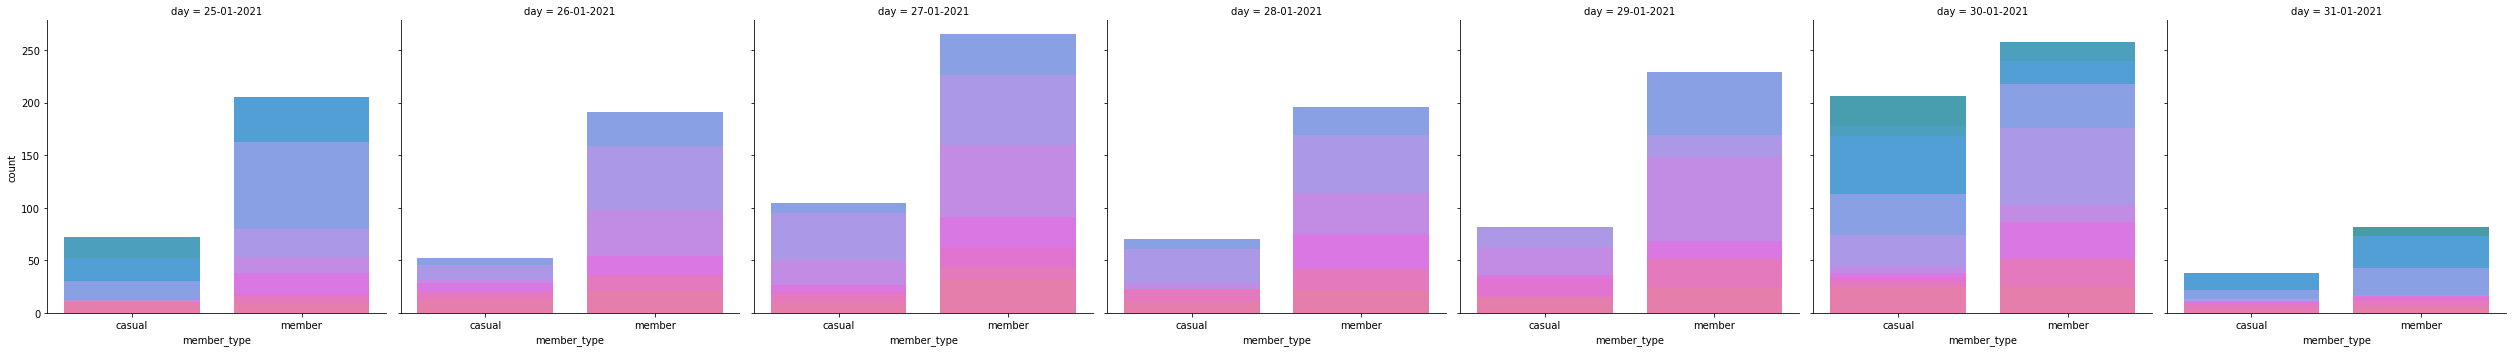

In [13]:
g = sns.FacetGrid(df1, col = 'day',hue = 'hour',height = 5,aspect=1)
g.map(sns.barplot,'member_type','count')

In [14]:
# How to convert category data into seperate colomns

s = df1.groupby('member_type')['count'].apply(list)
df2 = s.apply(pd.Series).T

In [15]:
df1.drop_duplicates(subset=["day", "hour"], inplace= True)
df1.loc[:,"casual"] = list(df2.casual)
df1.loc[:,"member"] = list(df2.member)

In [16]:
df3 = df1.drop(columns=['member_type'])

,Unnamed: 0,day,hour,count,casual,member
0,0,25-01-2021,0,4,4.0,4.0
2,2,25-01-2021,1,2,2.0,4.0
4,4,25-01-2021,2,3,3.0,2.0
6,6,25-01-2021,3,1,1.0,3.0
8,8,25-01-2021,4,3,3.0,2.0
...,...,...,...,...,...,...
324,324,31-01-2021,19,9,9.0,15.0
326,326,31-01-2021,20,11,11.0,12.0
328,328,31-01-2021,21,9,9.0,7.0
330,330,31-01-2021,22,9,9.0,NaN
